In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Clase 2

## Biblioteca Pandas

Pandas es una biblioteca de Python muy usada para análisis y manipulación de datos. Provee principalmente dos tipos de clases para trabajar con datos:

- **Series:** un vector unidimensional indexado, que contiene datos de cualquier tipo
como números enteros, cadenas, objetos Python, etc.

- **DataFrame:** una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

Bibliografía recomendada: Sección 5 de Python for Data Analysis, de Wes McKinney (creador de la biblioteca Pandas), disponible on-line en forma gratuita en la página
https://wesmckinney.com/book/pandas-basics

### Series

Las series de Pandas son vectores similares a los arrays de NumPy, que podemos indexar usando etiquetas.

Crear la siguiente Series, observar qué devuelve array e index e interpretar.

In [ ]:
import pandas as pd
obj = pd.Series([7,4,-5,3])
obj

0    7
1    4
2   -5
3    3
dtype: int64

In [ ]:
obj.array

<PandasArray>
[7, 4, -5, 3]
Length: 4, dtype: int64

In [ ]:
obj.index # Por default , los indices van de 0 a N-1.

RangeIndex(start=0, stop=4, step=1)

Podemos asignar etiquetas (o índices) a cada valor de la serie.

In [ ]:
obj2 = pd.Series([np.pi,0,-2,1.41], index = ["d", "b", "c", "a"])
display(obj2)
display(obj2.array)
display(obj2.index)

d    3.141593
b    0.000000
c   -2.000000
a    1.410000
dtype: float64

<PandasArray>
[3.141592653589793, 0.0, -2.0, 1.41]
Length: 4, dtype: float64

Index(['d', 'b', 'c', 'a'], dtype='object')

Al igual que con arrays de Numpy podemos acceder a los elementos por su posición, o podemos usar las etiquetas.

In [ ]:
print(obj2["a"])
print(obj2[3])
obj2[1:3]

1.41
1.41


b    0.0
c   -2.0
dtype: float64

In [ ]:
obj3 = obj2[["a","b"]]
obj3
obj3.index

Index(['a', 'b'], dtype='object')

In [ ]:
obj2[obj2>1]

d    3.141593
a    1.410000
dtype: float64

Las operaciones que pueden aplicarse a numpy arrays pueden aplicarse también a series de Pandas, conservando los índices.

In [ ]:
np.exp(obj2)

d    23.140693
b     1.000000
c     0.135335
a     4.095955
dtype: float64

In [ ]:
obj2 * 3

d    9.424778
b    0.000000
c   -6.000000
a    4.230000
dtype: float64

¿Qué esperamos que de este código?

In [ ]:
obj + obj2

0   NaN
1   NaN
2   NaN
3   NaN
a   NaN
b   NaN
c   NaN
d   NaN
dtype: float64

NaN significa "not a number", se utiliza en series de Pandas para valores faltantes (missing values).

In [ ]:
# Y ahora?
obj4 = pd.Series([1,2,3,4], index = ["d", "b", "y", "z"])
obj2 + obj4

a         NaN
b    2.000000
c         NaN
d    4.141593
y         NaN
z         NaN
dtype: float64

Las series de Pandas tienen varias funciones útiles que iremos viendo más adelante. A modo de ejemplo, interpretar que hacen las siguientes funciones.

In [ ]:
series1 = pd.Series(["a", "b", "c", "b", "a", "c", "x"])
series1.isin(["b", "c"])

0    False
1     True
2     True
3     True
4    False
5     True
6    False
dtype: bool

In [ ]:
series1.value_counts()

a    2
b    2
c    2
x    1
Name: count, dtype: int64

### DataFrames
Un data frame es una representación de los datos en formato de tabla en la que cada
columna son vectores del mismo tamaño. Como cada columna es un vector, cada columna puede
contener datos de un único tipo. Se pueden pensar como variables. Cada variable corresponde a una
serie de Pandas, y todas las series de un dataframe están indexadas por los mismos ´ındices.

Una forma de crear un data frame es utilizando un "diccionario". Todas las variables del
diccionario deben ser vectores o listas de la misma longitud.

In [ ]:
data = {"nombres": ["Rodrigo", "Sergio", "Cristina", "Diana"], "altura": np.array([178, 172, 175, 168]), "peso": np.array
([81.2, 76.1, 68.5, 64.0])}
display(data)

{'nombres': ['Rodrigo', 'Sergio', 'Cristina', 'Diana'],
 'altura': array([178, 172, 175, 168]),
 'peso': array([81.2, 76.1, 68.5, 64. ])}

In [ ]:
type(data)

dict

In [ ]:
data["altura"]

array([178, 172, 175, 168])

In [ ]:
# Creamos un data frame con esos datos, usando los nombres como etiquetas
pacientes = pd.DataFrame(data)
display(pacientes)

,nombres,altura,peso
0,Rodrigo,178,81.2
1,Sergio,172,76.1
2,Cristina,175,68.5
3,Diana,168,64.0


In [ ]:
# En este ejemplo podemos usar los nombres como índices
pacientes = pd.DataFrame(data).set_index("nombres")
display(pacientes)

,altura,peso
nombres,,
Rodrigo,178,81.2
Sergio,172,76.1
Cristina,175,68.5
Diana,168,64.0


In [ ]:
# Podemos acceder a las columnas de dos formas distintas
alturas = pacientes["altura"]
alturas

nombres
Rodrigo     178
Sergio      172
Cristina    175
Diana       168
Name: altura, dtype: int64

In [ ]:
pacientes.altura

nombres
Rodrigo     178
Sergio      172
Cristina    175
Diana       168
Name: altura, dtype: int64

In [ ]:
type(alturas)

pandas.core.series.Series

A diferencia de las matrices en Numpy, un DataFrame de Pandas es un conjunto de columnas, no de filas.
Si queremos saber la altura de Rodrigo, pensar cuál de los dos comandos será correcto antes de ejecutarlos.

In [ ]:
#pacientes["Rodrigo"].altura
pacientes["peso"].Rodrigo

81.2

Para acceder a una fila de un dataframe, podemos usar los métodos `loc[]` y `iloc[]`.

¿Cómo se usan? ¿Cuál es la diferencia entre los dos comandos?

In [ ]:
pacientes.iloc[0]
# loc es por index de nombre
# iloc es por "orden"

altura    178.0
peso       81.2
Name: Rodrigo, dtype: float64

## Gapminder

A modo de ejemplo, vamos a explorar el dataset Gapminder que contiene datos poblacionales y de desarrollo humano de distintos países a lo largo del tiempo.

Si gapminder no está instalado, ejecutrar el siguiente comando para instalarlo

In [ ]:
pip install gapminder

In [ ]:
from gapminder import gapminder
display(gapminder)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Podemos ver información básica del DataFrame con la función info

In [ ]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
# Vemos todos los países en la base
gapminder["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [ ]:
# Cuántos países son?
gapminder["country"].nunique()

142

In [ ]:
# Si queremos ver cuántos países hay en cada continente...
# podemos agregupar por continente y ver el tamaño de cada grupo
gapminder.groupby("continent").size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [ ]:
# Pero cada país aparece varias veces, con datos de distintos años.
# Para contar sin repeticion usamos nuevamente nunique
gapminder.groupby("continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [ ]:
# Si queremos calcular porcentajes, dividimos por la cantidad total de paises
totalPaises = gapminder["country"].nunique()
gapminder.groupby("continent")["country"].nunique() / totalPaises

continent
Africa      0.366197
Americas    0.176056
Asia        0.232394
Europe      0.211268
Oceania     0.014085
Name: country, dtype: float64

In [ ]:
# O podemos usar el comando value_counts y pasarle un parámetro para que nos de los valores normalizados.
# (la normalización lleva la suma total a 1)
gapminder[["continent", "country"]].drop_duplicates().continent.value_counts(normalize=True)

continent
Africa      0.366197
Asia        0.232394
Europe      0.211268
Americas    0.176056
Oceania     0.014085
Name: proportion, dtype: float64

In [ ]:
# Vemos todos los años disponibles
gapminder["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [ ]:
# Tenemos datos de todos los países todos los años?
# Agrupamos los datos por año y calculamos el tamaño de cada bloque
gapminder.groupby("year").size()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

In [ ]:
# O podemos usar directamente el comando value_counts
gapminder.year.value_counts()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

In [ ]:
# También podemos por ejemplo calcular la poblacion total por año
gapminder.groupby("year")["pop"].sum()

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

### Gráficos simples de funciones o puntos en el plano XY.
Vamos a graficar la población total mundial en función del año.

In [ ]:
pobAnual = gapminder.groupby("year")["pop"].sum()
type(pobAnual)

pandas.core.series.Series

In [ ]:
pobAnual

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

In [ ]:
pobAnual.index

Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype='int64', name='year')

<Axes: xlabel='year'>

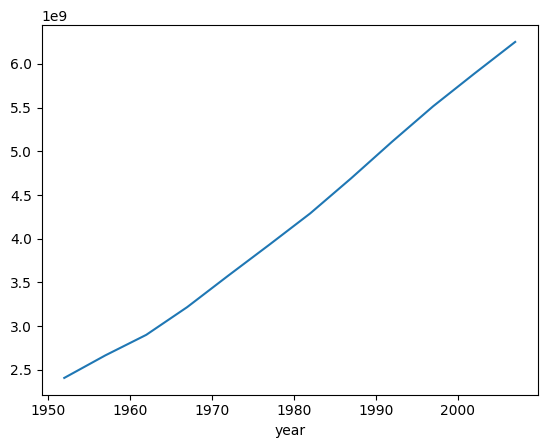

In [ ]:
# Opción 1
# Usamos la función plot de series de pandas
pobAnual.plot()

<Axes: xlabel='year'>

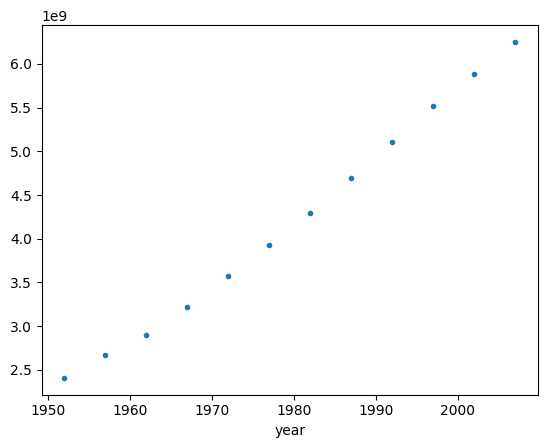

In [ ]:
# O podemos graficar solo puntos
pobAnual.plot(style = ".")

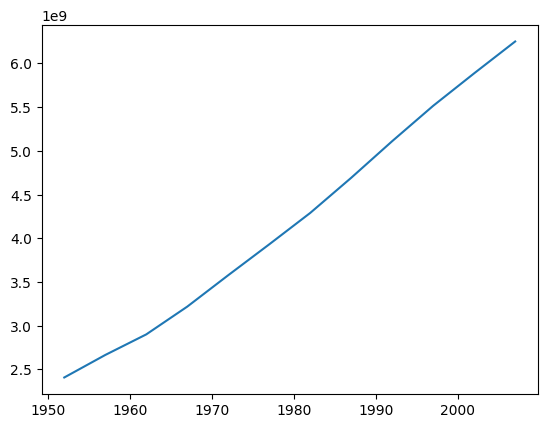

In [ ]:
# Opcion 3
# Asignamos los valores a variables (arrays de numpy) y graficamos las variables
x = pobAnual.index
y = pobAnual.values
plt.plot(x,y)

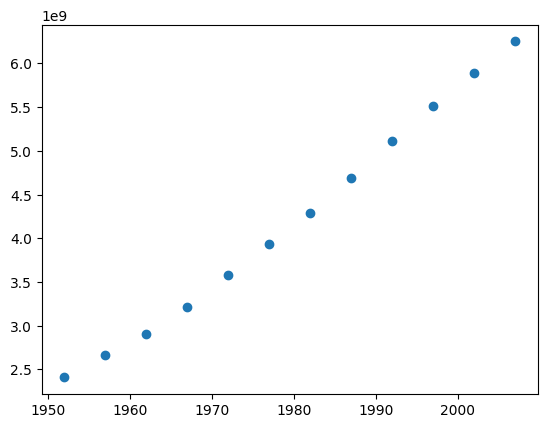

In [ ]:
# Opcion 4
# Matplotlib tiene una función scatter para graficar puntos
plt.scatter(x,y)

In [ ]:
# Vamos a analizar los datos de 2007
datos2007 = gapminder[gapminder["year"]==2007]

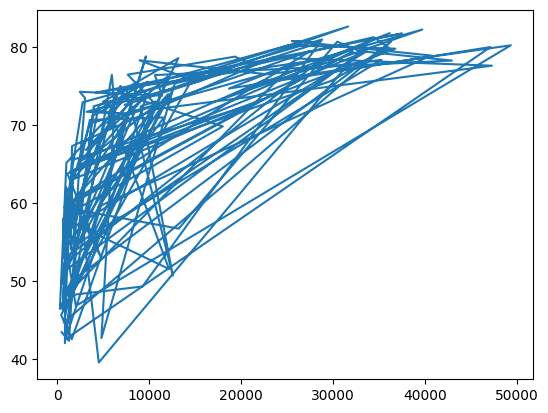

In [ ]:
# Queremos ver si hay relación entre el producto bruto y la expectativa de vida
plt.plot(datos2007.gdpPercap, datos2007.lifeExp)

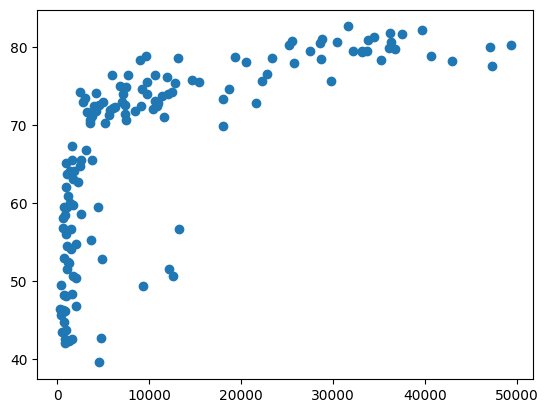

In [ ]:
# Ay no, eso no, hacemos un "scatter plot"
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

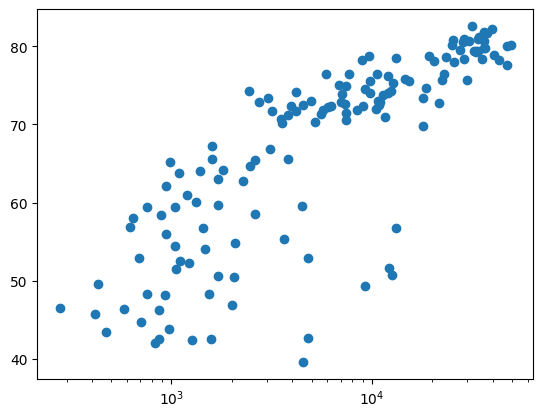

In [ ]:
# Se ve mejor la correlación si usamos escala logaritmica en el eje X
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')

Vamos a mejorar un poco el gráfico

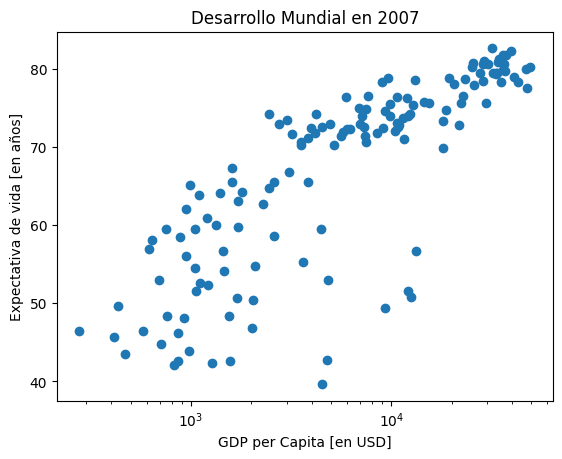

In [ ]:
# Agregamos etiquetas al gráfico y a los ejes
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.show()

Reemplacemos las marcas en el eje $x$ 10³, 10⁴, 10⁵ con 1k, 10k y 100k.

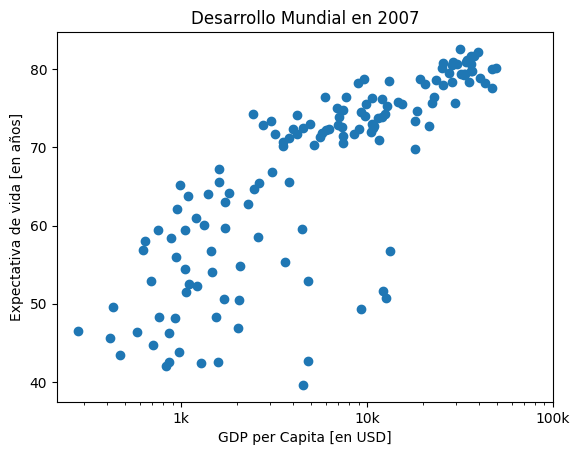

In [ ]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

Seaborn es una biblioteca para visualización de datos en Python, basada en Matplotlib que agrega muchas funcioanlidades.

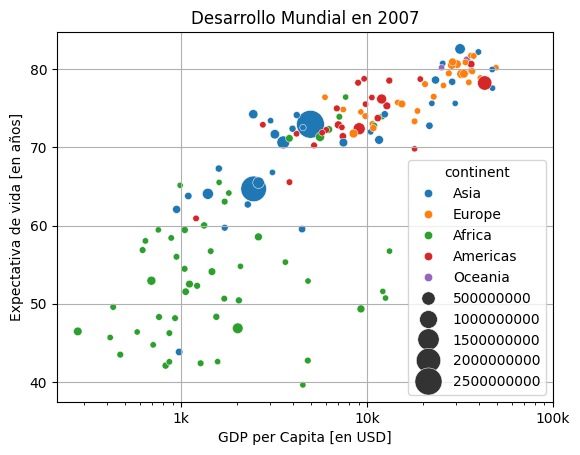

In [ ]:
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico

# Almacenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])

sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop*2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

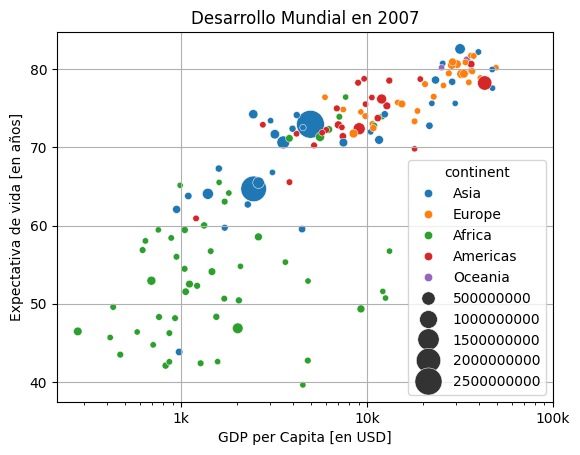

In [ ]:
# Aumenta el tamaño del gráfico
plt.figure(dpi=100)

# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

## Archivos de datos

La biblioteca Pandas nos permite trabajar fácilmente con archivos de datos.
1. Leer el archivo casos_coronavirus.csv .
2. Graficar la curva de casos por día.
3. Graficar la curva de casos acumulados.
4. Definir log_cum_casos como el logaritmo de la cantidad de casos acumulados y graficar en función de la cantidad de días transcurridos.

Utilicen o modifiquen el siguiente código.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("casos_coronavirus.csv") # DataFrame
df.head()  # Primeras filas del DataFrame

,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0


In [ ]:
# Información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               96 non-null     object
 1   confirmados_Nuevos  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


<Axes: >

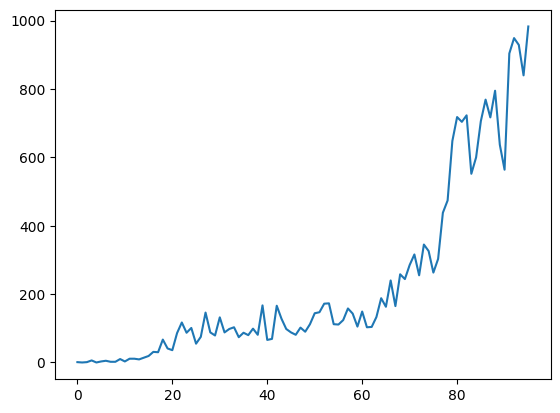

In [ ]:
df["confirmados_Nuevos"].plot()

In [ ]:
casos_acumulados = df["confirmados_Nuevos"].cumsum()

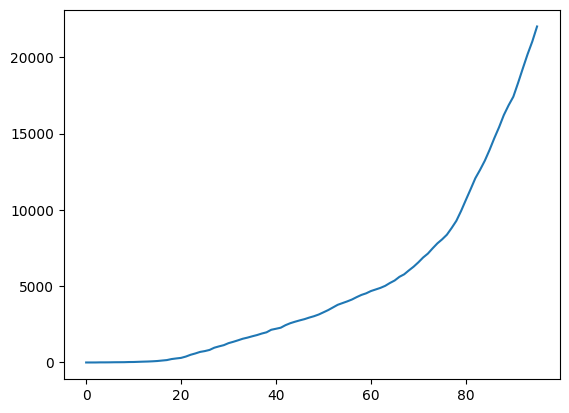

In [ ]:
plt.plot(casos_acumulados)


## Estadística descriptiva

Mirando los datos de 2007, ¿cuál es el país con mayor expectativa de vida? ¿Cuál es el país con menor expectativa de vida?

In [ ]:
datos2007["lifeExp"].min()

39.613

In [ ]:
datos2007["lifeExp"].max()

82.603

### Medidas de tendencia central

Para el año 2007, calcular el valor medio y la mediana de las variables gdpPercap y lifeExp entre todos los países.
Son similares o distintas? A qué lo atribuyen? Consideran que alguna resume mejor la realidad que la otra?


In [ ]:
datos2007["lifeExp"].median()

71.93549999999999

In [ ]:
datos2007["lifeExp"].mean()

67.00742253521126

In [ ]:
datos2007["gdpPercap"].median()

6124.3711084999995

In [ ]:
datos2007["gdpPercap"].mean()

11680.071819878167

Es lo mismo el promedio de entre todos los países de la expectativa de vida y el promedio entre todas las personas entre todas las personas?
¿Cómo podemos calcular el promedio entre todas las personas?


In [ ]:
np.sum(datos2007.lifeExp * datos2007["pop"])/np.sum(datos2007["pop"])

68.91909251904043

### Medidas de dispersión

Para el año 2007, calcular la varianza y el desvío estándar de las variables gdpPercap y lifeExp entre todos los países.

In [ ]:
datos2007["lifeExp"].var()

145.7578240471481

In [ ]:
datos2007["lifeExp"].std()

12.07302050222512